# Vegetable price Analysis
An analysis of different types of vegetable price in each month for the year 2023




# Data Loading


Importing all packages

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from datetime import date as dt
import matplotlib.pyplot as plt



Loading the data from a csv file.

In [2]:
df = pd.read_csv('prices.csv')
df



,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40


# Data Cleaning 
Data cleaning is an Important step in data analysis to ensure accuracy, consistency, and reliability within a dataset. It addresses issues like outliers, inconsistent data, data type conversions, and handling missing or duplicate values. By thoroughly cleaning data, we lay the groundwork for precise analysis and enable accurate decision-making

#### Checking for missing data
isnull() is a method used to detect missing or null values in certain data structures. It returns True for missing values and False for non-missing (valid) values. It can be used in combination with other functions to count, filter, and replace missing values.

In [3]:
# Checking for missing data
df.isnull().any(axis=0).sum() # for columns
df.isnull().any(axis=1).sum() # for rows
df.isnull().sum()

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

<li>No evidence of missing data

#### Checking for duplicates


In [4]:
df['Price Dates'].duplicated().sum()

0

<li> The sum of duplicated rows is 0, meaning there are duplicates


#### Checking for outliers

In [5]:
df.describe()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


<li> Methi has a max of 2000, this might suggest an outlier

<li>Green Chilli has close to zero minimum (0.13) this might also suggest be an outlier


# Data Summary



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


The .info() function provides essential information about the dataset, such as column names, data types (Dtype) for each column, and the number of non-null values


In [28]:
df.describe()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


The describe() function provides summary statistics of the data. Its a non graphical tool produce statistical summary

From the results above we have these observations:

<li> Methi has a max of 2000, this might suggest an outlier
<li> Green Chilli has close to zero minimum (0.13) this might also suggest be an outlier
<li> Bhindi, Onion , Brinjal, Garlic, Peas, Methi,Green Chilli are positively skewed, because their means are > median
<li> Potato, Elephant Yam (Suran) are negatively skewed
<li> Tomato is symetric because mean = median


Since Methi shows an outlier and is a numerical (continous) variable we will replace it with the mean


In [30]:
def channge_outlier(x):
    if x >= 2000:
        return df['Methi'].mean()
    else:
        return x

df['Methi'] = df['Methi'].astype(float)
df['Methi'] = df['Methi'].apply(channge_outlier)

df.describe()


,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,13.485656,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,6.269256,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,35.000000,90.000000,50.000000


Kurtosis is a statistical measurement that describes the distribution of data points in a dataset, focusing on the tailedness and asymmetrical behavior of the data. A kurtosis near 0 implies that the distribution is approximately normal.

In [31]:

df.kurtosis(numeric_only=True)


Bhindi (Ladies finger)      0.362337
Tomato                    287.000000
Onion                       0.692638
Potato                     -0.731091
Brinjal                     2.857873
Garlic                     -0.008867
Peas                       -0.412516
Methi                       0.595027
Green Chilli                2.141107
Elephant Yam (Suran)        0.930687
dtype: float64

Tomato, brinjal and exhibit high kurtosis, indicating extreme outliers. Onion, bhindi, green chili, methi and elephant yam show moderate kurtosis with some outliers. Conversely, potato and peas display negative kurtosis, suggesting more stable, uniform distributions with fewer extreme values. Garlic is closest to a normal distribution with minimal outliers.

# Exploratory Data Analysis (EDA)

EDA is a crucial step in the data analysis pipeline. It is the process of analyzing and visualizing datasets to summarize their main characteristics and extract useful insights, often with the help of statistical graphics, plots, and other data visualization tools.

EDA can help identify if the Price Dates column contains inconsistent formats, such as:

Dates in different formats (e.g., DD-MM-YYYY vs YYYY-MM-DD).
Invalid date entries (e.g., empty strings, text like "N/A", or malformed dates like "2024-13-01").
When trying to transform a column (Price Dates) into a datetime format using the to_date() function. There may be several issues in this code that could lead to errors, and EDA can help identify and troubleshoot these issues.



#### Distribution of each vegetable price


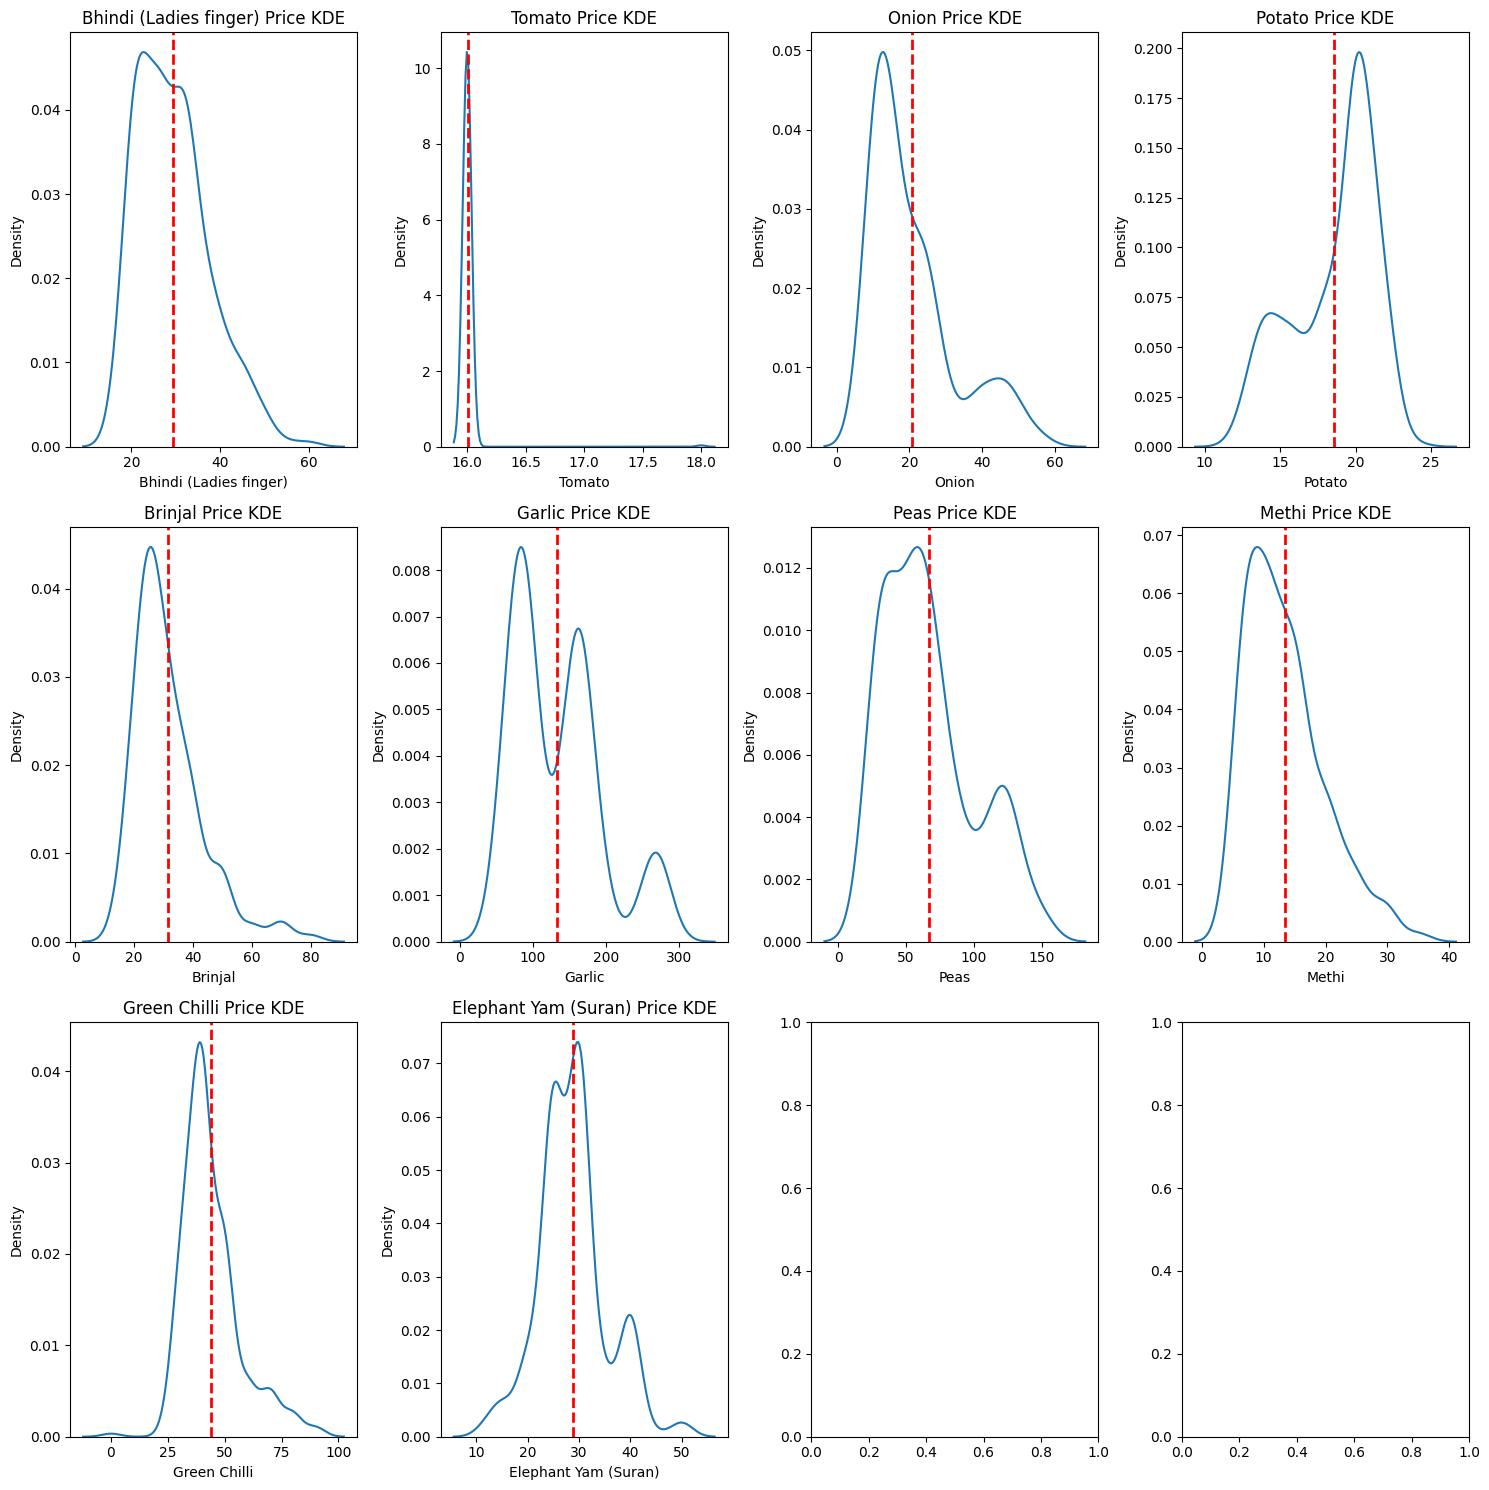

In [32]:
numerical_columns = df.select_dtypes('number')
# Assuming MD_agric_df is already defined with the simulated data

# Setting up a 5x4 grid of plots
fig, axes = plt.subplots(3, 4, figsize=(15, 15))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plotting a KDE for each column in its respective subplot
for i, column in enumerate(numerical_columns.columns):
    mean_val = numerical_columns[column].mean()
    sns.kdeplot(numerical_columns[column], ax= axes[i])
    axes[i].set_title(f"{column} Price KDE")
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2)


plt.tight_layout()
plt.show()


The above kde plots show price distribution around the mean.

Onion, brinjal, methi and green chili distributions are slightly left-skewed, indicating that most values fall below the mean. As a result, the mean may not be the best measure of central tendency, as it is influenced by higher, maximal values

The distribution of potato values is right-skewed, meaning most values are above the mean. Consequently, the mean may not be the best measure of central tendency, as it is affected by extremely low values

Tomato are evenly distributed around the mean, indicating that the data is balanced around the center. In this case, the mode, median, and mean are fairly similar or close to each other, providing a consistent measure of central tendency

Garlic, Suran and Peas are multi- modal, this means they have different peak prices. Whereas the rest have single price peaks.
In this case, the median and mode are often better indicators of central tendency than the mean


## Average price per month

In [33]:

month_map = {
    1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6,
    7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12
}

df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')
df['Month'] = df["Price Dates"].dt.month.map(month_map)
df




,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),Month
0,2023-01-01,35.0,18,22.0,20,30,50,25,8.0,45.0,25,1
1,2023-01-02,35.0,16,22.0,20,30,55,25,7.0,40.0,25,1
2,2023-01-03,35.0,16,21.0,20,30,55,25,7.0,40.0,25,1
3,2023-01-04,30.0,16,21.0,22,25,55,25,7.0,40.0,25,1
4,2023-01-08,35.0,16,20.0,21,25,55,22,6.0,35.0,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...
282,2023-12-27,45.0,16,30.0,20,70,260,40,16.0,40.0,25,12
283,2023-12-28,45.0,16,30.0,20,70,260,30,20.0,45.0,25,12
284,2023-12-29,45.0,16,30.0,22,80,260,30,18.0,50.0,25,12
285,2023-12-31,45.0,16,26.0,20,60,250,40,16.0,50.0,40,12


In [34]:

mean_month = df.groupby('Month').mean(numeric_only=True)
ax = list(mean_month.index)

mean_month



,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
Month,,,,,,,,,,
1,38.277778,16.111111,17.416667,20.388889,39.444444,72.222222,26.166667,10.333333,38.611111,28.333333
2,35.979167,16.000000,12.187500,14.958333,32.750000,73.750000,31.041667,8.125000,40.083333,27.500000
3,32.980769,16.000000,11.384615,13.615385,22.153846,79.038462,38.461538,7.192308,45.576923,24.961538
4,30.229167,16.000000,9.354167,15.500000,24.166667,82.291667,67.958333,13.125000,37.922083,27.083333
5,21.620000,16.000000,10.680000,20.320000,24.400000,92.200000,63.000000,11.520000,37.560000,24.600000
6,23.220000,16.000000,13.720000,20.280000,32.800000,98.000000,64.400000,15.960000,55.200000,24.760000
7,25.160000,16.000000,16.560000,19.720000,34.200000,143.400000,105.600000,15.135331,73.000000,30.680000
8,24.040000,16.000000,21.480000,20.200000,31.000000,156.400000,77.200000,9.000000,42.800000,35.640000
9,21.652174,16.000000,23.347826,18.565217,24.000000,161.739130,71.304348,16.869565,38.478261,28.217391


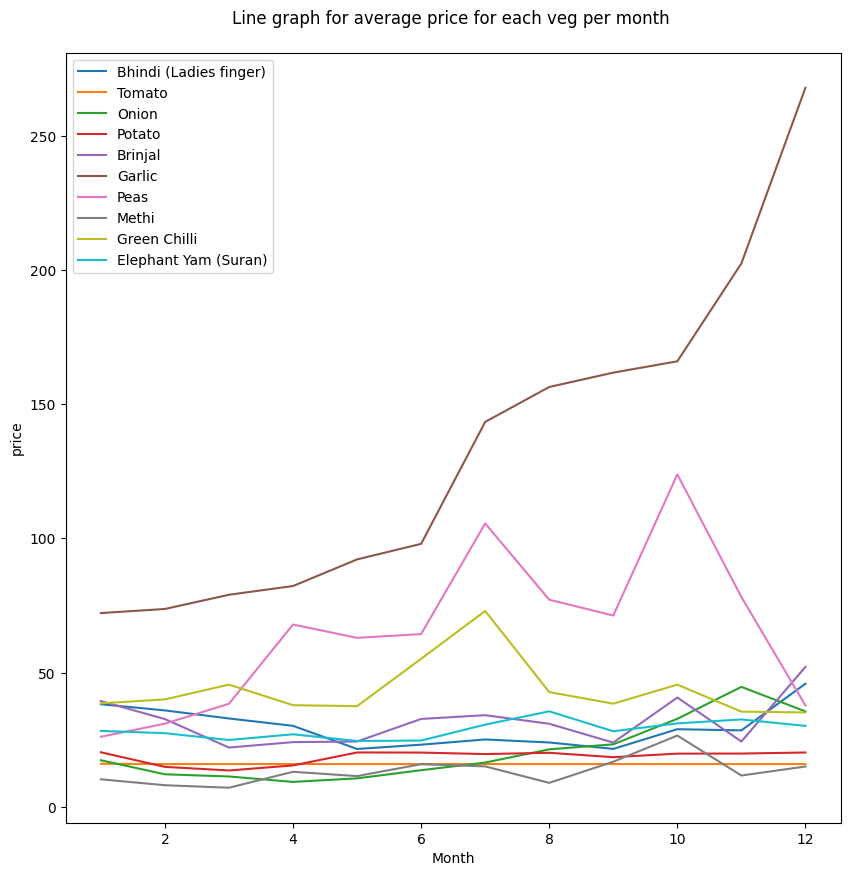

In [ ]:
mean_month = df.groupby('Month').mean(numeric_only=True)

ax = sorted(list(mean_month.index))
y_ax = mean_month.select_dtypes('number')

# Plot the line graph.
plt.figure(figsize=(10, 10))
plt.plot(ax, y_ax)
plt.legend(mean_month.columns)

# Set axis and graph titles.
plt.xlabel('Month')
plt.ylabel('price')
plt.title('Line graph for average price for each veg per month \n')

plt.show()


From the line graph above:

<li> Garlic shows an upward trend, price increases throughout the year.
<li> Peas a seasonal trend, price peaks every 3 month period (season).
<li> Green chilli and  shows a fairly constant trend with a peak at month 7.
<li> Tomato, Bhindi, Elephant Yam, Potato are stationary with no obvious trend, prices are the same.
<li> Onion shows a slight upward trend throughout the year.

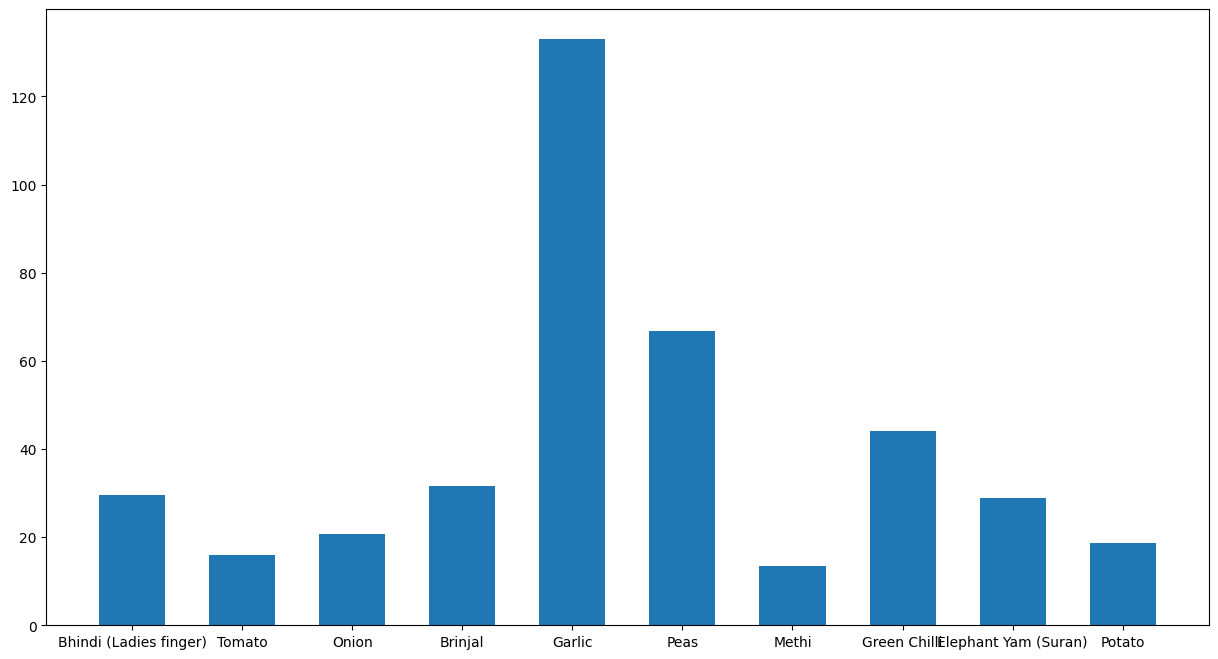

In [36]:
list_of_means = [ df['Bhindi (Ladies finger)'].mean(), df['Tomato'].mean(), df['Onion'].mean(), df['Brinjal'].mean(), df['Garlic'].mean(),
                 df['Peas'].mean(), df['Methi'].mean(), df['Green Chilli'].mean(), df['Elephant Yam (Suran)'].mean(), df['Potato'].mean()]

list_of_names = ['Bhindi (Ladies finger)', 'Tomato', 'Onion','Brinjal','Garlic','Peas','Methi','Green Chilli','Elephant Yam (Suran)', 'Potato']
plt.figure(figsize=(15, 8))
plt.bar(list_of_names, list_of_means, width=0.6)
plt.show()


<li> Garlic is the most expensive vegetable
<li> Tomato is the least expensive

